<div align="center">
<a href="https://vbti.nl"><img src="images/vbti_logo.png" width="400"></a>
</div>

# Artificial Neural Networks
This notebook supports the 'Artificial Neural Network' chapter of the [1-day masterclass "Deep Learning"](https://aiblog.nl/masterclass-deep-learning). It is not ment as a full course on deep learning, but rather gives you a flavor of the topic. For an in-depth AI training or consultancy please contact [VBTI](https://vbti.nl). 

Artificial Neural Networks are machine learning models inspired by the working of biological neurons. During the masterclass the details of Perceptrons, Multi-Layer Perceptrons and learning rules are explained. In this notebook you will build and train an ANN to recognize handwitten numbers.

<div align="center">
<a href="https://aiblog.nl/masterclass-deep-learning"><img src="images/ann.png" width="400"></a>
</div>

In [1]:
# import some default libaries
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
In this example the well known MNIST dataset is used. The datasets consists of 70,000 images of handwritten numbers. The challenge is to train a neural network that labels each image with the correct number. To train the neural network 60,000 images are used. The remaining 10,000 images are used to validate the performance of the neural network.

First the data is imported and scaled so the neural network can handle the data.

In [2]:
from keras.datasets import mnist

# load data
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# scale data
x_train, x_val = x_train / 255.0, x_val / 255.0

# inspect shape and type
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_val.dtype, y_train.dtype

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 dtype('float64'),
 dtype('uint8'))

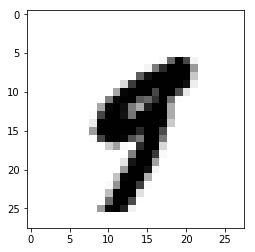

In [3]:
# plot a sample point
plt.imshow(x_train[36000], cmap='binary')

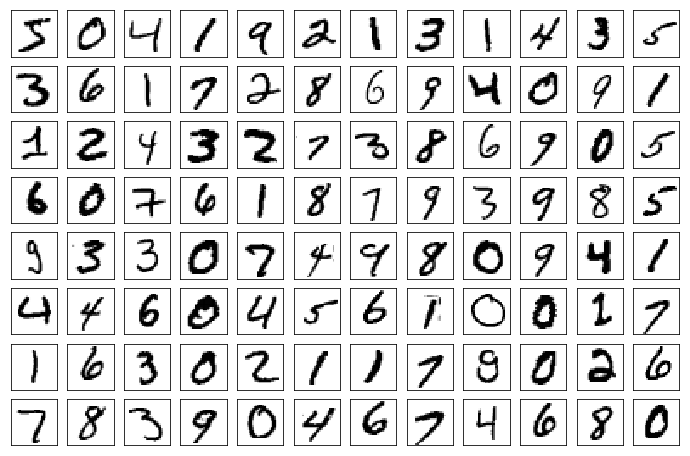

In [4]:
# plot first few numbers
nrows, ncols = 8, 12
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
axs = axs.ravel() 
for i in range(nrows*ncols):
    axs[i].imshow(x_train[i], cmap='binary')
    axs[i].set(xticks=[], yticks=[])

In [5]:
# reformat data in the form (batch_size, input_vector_size)
print("Change X array from shape {} ... ".format(x_train.shape))
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2])
print("to shape {}".format(x_train.shape))

Change X array from shape (60000, 28, 28) ... 
to shape (60000, 784)


In [6]:
# reformat target vector from categorical label to one-hot-encoding
from keras import utils

# reformat labels to one-hot-encoded labels
print('Before y_train[0] = {}'.format(y_train[0]))
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
print('After y_train[0] = {}'.format(y_train[0]))

Before y_train[0] = 5
After y_train[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build neural network
A neural network can be build in two step. First the topology of the neural network is defined. This contains o.a. the number of layers, number of nodes (neurons) per layer and type of activation function. Next, a loss function and optimization function need to be defined. The [Keras](https://keras.io) framework is used for programming the neural network.

In [7]:
from keras import models
from keras import layers
from keras import optimizers

# define model topology
model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# define model optimization method
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['categorical_accuracy'])

# Train neural network

In [8]:
history = model.fit(x_train, y_train, epochs=20, batch_size=60, validation_data=(x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0681 - categorical_accuracy: 0.8778 - val_loss: 0.0366 - val_categorical_accuracy: 0.9382
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0327 - categorical_accuracy: 0.9451 - val_loss: 0.0286 - val_categorical_accuracy: 0.9512
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0258 - categorical_accuracy: 0.9565 - val_loss: 0.0247 - val_categorical_accuracy: 0.9576
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0215 - categorical_accuracy: 0.9642 - val_loss: 0.0216 - val_categorical_accuracy: 0.9626
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0187 - categorical_accuracy: 0.9691 - val_loss: 0.0220 - val_categorical_accuracy: 0.9620
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0165 - categor

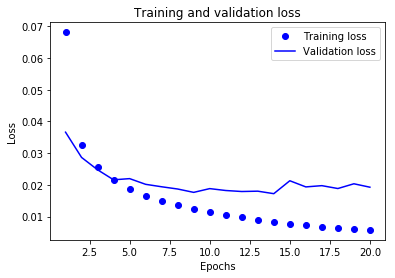

In [9]:
# plot training loss history
history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values  = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

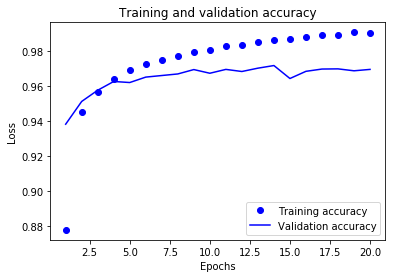

In [10]:
# plot training accuracy history
history_dict = history.history
loss_values  = history_dict['categorical_accuracy']
val_loss_values  = history_dict['val_categorical_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

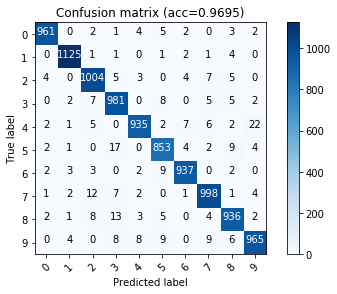

In [11]:
# Evaluate performance of model by plotting confusion matrix
from sklearn.metrics import confusion_matrix

# see http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    

    

# predict labels from validation set
y_pred = model.predict(x_val)

# convert data to label number
y_pred = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_val, axis=1) 

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred) 

# plot the confusion matrix
plot_confusion_matrix(cm, 
                      title='Confusion matrix (acc={})'.format(accuracy(y_true, y_pred)), 
                      classes = range(10))

# How to go further from here?
This notebook provides a basic processing pipeline for building a ANN that recognizes handwritten numbers. Experiment a little bit yourself by changing the number of layers, number of nodes per layer, number of epochs and learning rate. Try to increase the accuracy of the model.

## Hint
Increase the learning capacity of the ANN by increasing the number of neurons. 